In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

2023-02-16 22:22:15.887462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 22:22:19.716017: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 22:22:19.716087: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-16 22:22:31.086631: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Data Preprocessing

In [2]:
# read dataset

dt = pd.read_csv('data_train.csv')
dt = dt.sample(frac=1)

dt

,tweet,label
973,rasanya pingin cepet cepet 2024 aja,netral
669,sikap pemuda pancasila dukung anies baswedan ...,dukungan
95,polling bohongan itu gak punya malu cukup jak...,tidak mendukung
439,breaking news partai nasdem resmi mendeklaras...,dukungan
1400,anies baswedan menyampaikan rasa terima kasih ...,dukungan
...,...,...
45,NaN,NaN
1397,gubernur anies baswedan kerjanya tukang ngibul...,hujatan
198,waduh postingan buat tanggal 16 oktober 2022 u...,hujatan
11,smoga allah melindungi ab smoga allah nampakk...,dukungan


In [3]:
# delete NaN data
dt.dropna(inplace=True)

dt

,tweet,label
973,rasanya pingin cepet cepet 2024 aja,netral
669,sikap pemuda pancasila dukung anies baswedan ...,dukungan
95,polling bohongan itu gak punya malu cukup jak...,tidak mendukung
439,breaking news partai nasdem resmi mendeklaras...,dukungan
1400,anies baswedan menyampaikan rasa terima kasih ...,dukungan
...,...,...
817,bikin buku menjilat wan jamban lagi mar siapa...,tidak mendukung
1397,gubernur anies baswedan kerjanya tukang ngibul...,hujatan
198,waduh postingan buat tanggal 16 oktober 2022 u...,hujatan
11,smoga allah melindungi ab smoga allah nampakk...,dukungan


In [4]:
# update label

dt['label'] = dt['label'].replace({'pujian':'dukungan', 'hujatan':'tidak mendukung'})

## Data Preparation

dukungan           569
tidak mendukung    486
netral             181
Name: label, dtype: int64

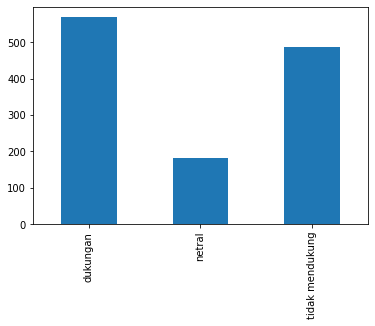

In [5]:
# visualize data

dt['label'].value_counts().sort_index().plot.bar()
dt['label'].value_counts()

In [6]:
# tokenizer text

tokenizer = Tokenizer(num_words=5000, split=" ")

tokenizer.fit_on_texts(dt['tweet'].values)
X = tokenizer.texts_to_sequences(dt['tweet'].values)
X = pad_sequences(X)
print(X)

[[   0    0    0 ... 1122   13   36]
 [   0    0    0 ... 1123 1124    9]
 [   0    0    0 ... 1865 1866  301]
 ...
 [   0    0    0 ...  214 1806   36]
 [   0    0    0 ...  136  335 1334]
 [   0    0    0 ...   68   37  149]]


In [7]:
# get label

y = pd.get_dummies(dt['label']).values
y

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [8]:
print(y.shape)

(1236, 3)


In [9]:
# split dataset smote tanpa menggunakan tokenizing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(988, 51)
(248, 51)


## Training Model

In [10]:
# LSTM Modelling

model = Sequential()
model.add(Embedding(5000, 256))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2023-02-16 22:22:46.699777: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 22:22:46.699999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-16 22:22:46.700181: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-16 22:22:46.700352: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-16 22:22:46.700517: W tensorfl

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         1280000   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 lstm (LSTM)                 (None, None, 256)         525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 32
epochs = 50

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_test, y_test))

Epoch 1/50
31/31 - 16s - loss: 1.0116 - accuracy: 0.5030 - val_loss: 0.9239 - val_accuracy: 0.5847 - 16s/epoch - 505ms/step
Epoch 2/50
31/31 - 11s - loss: 0.8059 - accuracy: 0.6822 - val_loss: 0.8755 - val_accuracy: 0.6169 - 11s/epoch - 352ms/step
Epoch 3/50
31/31 - 11s - loss: 0.5217 - accuracy: 0.7925 - val_loss: 0.8709 - val_accuracy: 0.6371 - 11s/epoch - 343ms/step
Epoch 4/50
31/31 - 11s - loss: 0.2415 - accuracy: 0.9180 - val_loss: 1.3163 - val_accuracy: 0.5887 - 11s/epoch - 348ms/step
Epoch 5/50
31/31 - 11s - loss: 0.1482 - accuracy: 0.9474 - val_loss: 1.2143 - val_accuracy: 0.6411 - 11s/epoch - 352ms/step
Epoch 6/50
31/31 - 11s - loss: 0.0557 - accuracy: 0.9858 - val_loss: 1.3820 - val_accuracy: 0.6210 - 11s/epoch - 354ms/step
Epoch 7/50
31/31 - 11s - loss: 0.0345 - accuracy: 0.9879 - val_loss: 1.5012 - val_accuracy: 0.6492 - 11s/epoch - 351ms/step
Epoch 8/50
31/31 - 11s - loss: 0.0471 - accuracy: 0.9909 - val_loss: 1.3417 - val_accuracy: 0.6613 - 11s/epoch - 350ms/step
Epoch 9/

In [ ]:
# save model into file .h5

model.save('sentiment_analysis.h5')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Mengambil data dari history pelatihan model
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [16]:
# Membuat plot
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")

<Figure size 864x360 with 0 Axes>

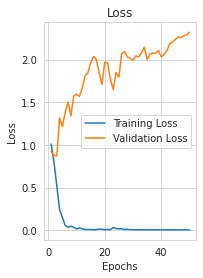

In [17]:
plt.subplot(1,2,1)
sns.lineplot(x=range(1,epochs+1), y=train_loss, label='Training Loss')
sns.lineplot(x=range(1,epochs+1), y=val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

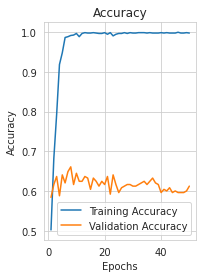

In [18]:
plt.subplot(1,2,2)
sns.lineplot(x=range(1,epochs+1), y=train_acc, label='Training Accuracy')
sns.lineplot(x=range(1,epochs+1), y=val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

8/8 [==============================] - 1s 57ms/step
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       119
           1       0.38      0.47      0.42        32
           2       0.65      0.60      0.62        97

    accuracy                           0.61       248
   macro avg       0.56      0.58      0.57       248
weighted avg       0.62      0.61      0.62       248



In [20]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[79 16 24]
 [10 15  7]
 [31  8 58]]


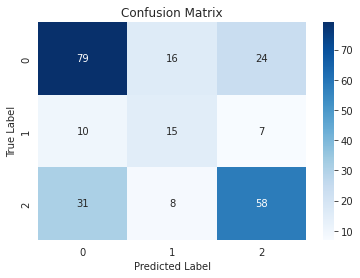

In [21]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Evaluate Model

In [22]:
# evaluate model with data test

score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

8/8 - 1s - loss: 2.3195 - accuracy: 0.6129 - 1s/epoch - 142ms/step
score: 2.32
acc: 0.61


## Predict New Dataset

In [30]:
# read new dataset
import re
import numpy as np
import pandas as pd
data = pd.read_csv('tweet2.csv')
# menghapus kolom id
data = data.drop(['id'], axis=1)

data

,tweet
0,"@M45Broo_ Cebong benar2 panik luar biasa, ini ..."
1,@Relawananies https://t.co/uf5sE0iGLI
2,RT @BosPurwa: #IndonesiaMemanggil \n5 Tahun An...
3,RT @aLy_Bima: Video ini hanya untuk orang yang...
4,"RT @tempodotco: ""Tidak ringan permasalahan di ..."
...,...
445,RT @Relawananies: Momen haru saat Anies Baswed...
446,@maspiyuaja Terima kasih om https://t.co/PUgr2...
447,RT @BosPurwa: #IndonesiaMemanggil \n5 Tahun An...
448,RT @OposisiCerdas: Kamhar Lakumani Sebut Anies...


In [31]:
# data preprocessing

def tweetPrepocessing(text):
  text = text.lower()
  text = re.sub('\n','', text)
  text = re.sub('rt ','', text)
  text = re.sub('#','', text)
  text = re.sub('@\w+(?:\:)\ ','', text)
  text = re.sub(r'(?:\@|http?\://|https?\://|www)\S+','', text)
  text = re.sub('[^a-zA-z0-9\s]','', text)
  text = re.sub('  ',' ', text)

  if text == ' ':
    return None

  return text

data = data.sample(frac=1)
data['tweet'] = data['tweet'].apply(tweetPrepocessing)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace = True)

data

,tweet
0,jalan beda heru budi dan anies baswedan di jak...
1,simpul relawan anies baswedan siap bersinergi ...
2,yang sabar ya buzz allah sedang menunjukkan ja...
3,gelar acara dukungan warga jateng ingin merasa...
4,awas ada give away baju shopee
...,...
430,gelar acara dukungan warga jateng ingin merasa...
431,kenduri rakyat jarnas anies baswedan memggelar...
432,warga kota makassar menyambut pelepasan gubern...
433,relawan jarnas di seluruh indonesia bergerak d...


In [32]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(num_words=5000, split=" ")

tokenizer.fit_on_texts(data['tweet'].values)
X = tokenizer.texts_to_sequences(data['tweet'].values)
X = pad_sequences(X)
print(X)


tokenizer.fit_on_texts(data['tweet'].values)

X_new = tokenizer.texts_to_sequences(data['tweet'].values)
X_new = pad_sequences(X_new)
X_new.shape

[[  0   0   0 ...   1   2 631]
 [  0   0   0 ... 426 162 322]
 [  0   0   0 ...  33 640 218]
 ...
 [  0   0   0 ... 161  11 210]
 [  0   0   0 ...   3   8 296]
 [  0   0   0 ...  52   1   2]]


(435, 42)

In [33]:
# load model
from keras.models import Sequential, load_model
mymodel = load_model('sentiment_analysis.h5')

In [34]:
# predict data

pred = mymodel.predict(X_new)


14/14 [==============================] - 3s 121ms/step


In [35]:
# labelling

def labelling(array):
  labels = ['dukungan', 'netral', 'tidak mendukung']
  output = []
  for a in array:
    output.append(labels[np.argmax(a)])
  return output

label = labelling(pred)

In [36]:
# add label to data

data['label'] = label

data

,tweet,label
0,jalan beda heru budi dan anies baswedan di jak...,tidak mendukung
1,simpul relawan anies baswedan siap bersinergi ...,dukungan
2,yang sabar ya buzz allah sedang menunjukkan ja...,dukungan
3,gelar acara dukungan warga jateng ingin merasa...,dukungan
4,awas ada give away baju shopee,dukungan
...,...,...
430,gelar acara dukungan warga jateng ingin merasa...,dukungan
431,kenduri rakyat jarnas anies baswedan memggelar...,dukungan
432,warga kota makassar menyambut pelepasan gubern...,dukungan
433,relawan jarnas di seluruh indonesia bergerak d...,dukungan


In [43]:
# save to new csv

data.to_csv('tweet2_new.csv', index=False)